Here we find classification  find best model and find feauture importance and heat map


In [ ]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  default-jre-headless fonts-dejavu-core fonts-dejavu-extra
  libatk-wrapper-java libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6
  libxxf86dga1 openjdk-11-jre x11-utils
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  default-jre default-jre-headless fonts-dejavu-core fonts-dejavu-extra
  libatk-wrapper-java libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6
  libxxf86dga1 openjdk-11-jre x11-utils
0 upgraded, 12 newly installed, 0 to remove and 15 not upgraded.
Need to get 3,590 kB of archives.
After this operation, 12.4 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 default-jre-headless amd64 2:1.11-72 [3,192 B]
Get:2 http://archive.ubuntu.com/ubuntu focal/main amd64 libxtst6 amd64 2:1.2.3-1 [12.8 kB]
Get:3 http://archive.ubuntu.com/ubuntu f

In [ ]:
!pip install pandas
!pip install numpy
!pip install xgboost
!pip install scikit-learn
!pip install lime
!pip install catboost
!pip install lime



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import h2o
from h2o.automl import H2OAutoML

# Load the dataset into a Pandas DataFrame
data = pd.read_csv('/content/country_wise_latest.csv')

# Define new threshold values for different risk levels
low_risk_threshold = 100
high_risk_threshold = 500

# Convert target variable into classes based on new thresholds
data['RiskLevel'] = np.where(data['Deaths'] <= low_risk_threshold, 'Low Risk',
                             np.where(data['Deaths'] <= high_risk_threshold, 'Medium Risk', 'High Risk'))

# Initialize H2O
h2o.init()

# Convert the Pandas DataFrame to an H2OFrame
h2o_df = h2o.H2OFrame(data)

# Split the data into features (X) and target variable (y)
X = h2o_df.drop(['Deaths', 'RiskLevel'])
y = h2o_df['RiskLevel']

# Set the target variable as a factor (classification task)
y = y.asfactor()

# Perform train-test split
train, test = h2o_df.split_frame(ratios=[0.8], seed=42)

# Define the AutoML model
automl = H2OAutoML(max_runtime_secs=300, seed=42)  # Specify the maximum runtime and random seed

# Train the AutoML model
automl.train(x=X.columns, y='RiskLevel', training_frame=train)

# Get the best model from AutoML
best_model = automl.leader

# Print the best model
print(best_model)

# Get the feature importance from the best model
feature_importance = best_model.varimp(use_pandas=True)

# Print the feature importance
print(feature_importance)


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,2 hours 55 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,1 month and 21 days
H2O_cluster_name:,H2O_from_python_unknownUser_ma3tqt
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.590 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
18:08:03.457: _train param, Dropping bad and constant columns: [Country/Region]


18:08:04.158: _train param, Dropping bad and constant columns: [Country/Region]

███
18:08:06.903: _train param, Dropping bad and constant columns: [Country/Region]
18:08:06.903: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 153.0.
18:08:06.904: _train param, Dropping unused columns: [Country/Region]
18:08:08.339: _train param, Dropping bad and constant columns: [Country/Region]
18:08:09.225: _train param, Dropping bad and constant columns: [Country/Region]


18:08:09.992: _train param, Dropping bad and constant columns: [Country/Region]

██
18:08:12.370: _train param, Dropping bad and constant columns: [Country/Region]

█
18:08:14.298: _train param, Dropping bad and constant columns: [Country/Region]

██
18:

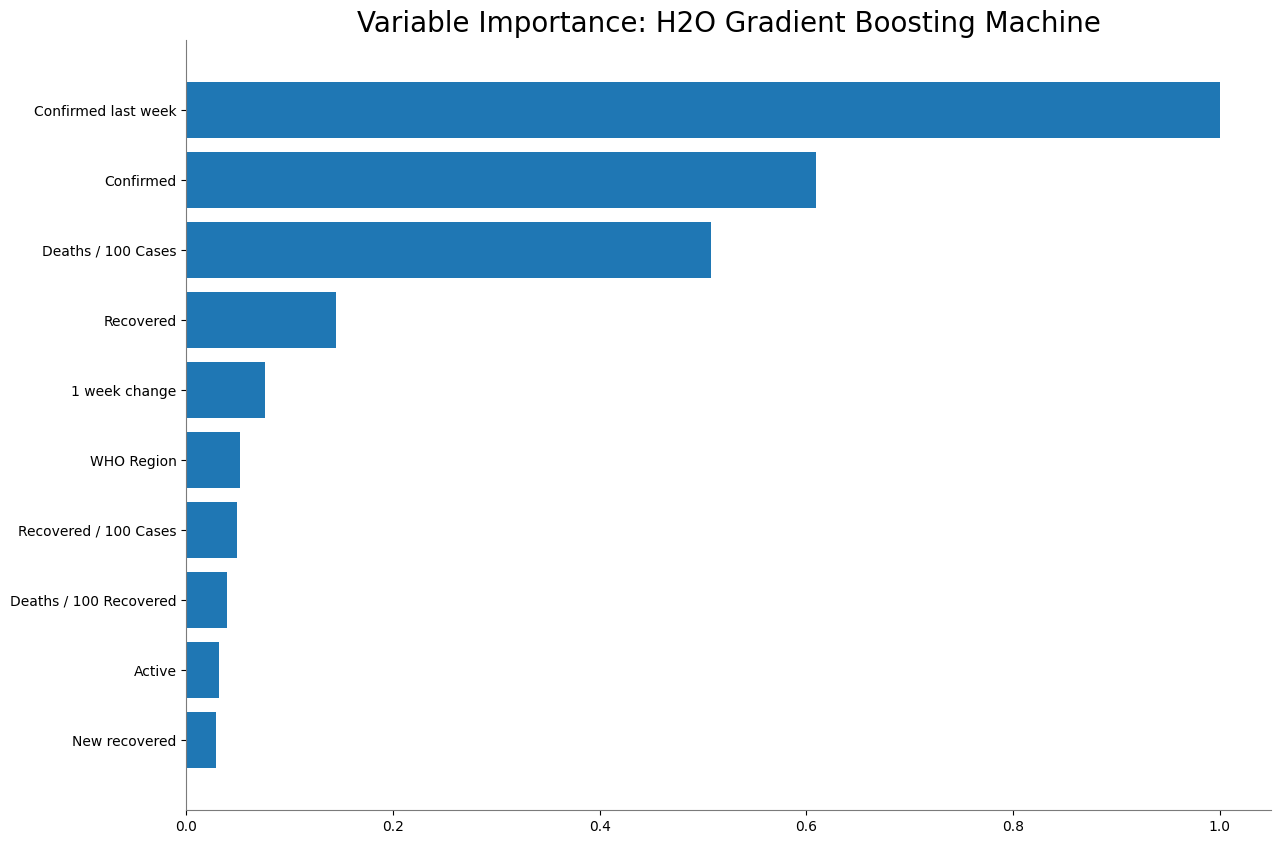

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import lime
import lime.lime_tabular
import shap

# Plot feature importance
best_model.varimp_plot()




# Individual Conditional Expectation

> Individual conditional expectations (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response for a given row. ICE plot is similar to partial dependence plot (PDP), PDP shows the average effect of a feature while ICE plot shows the effect for a single instance.

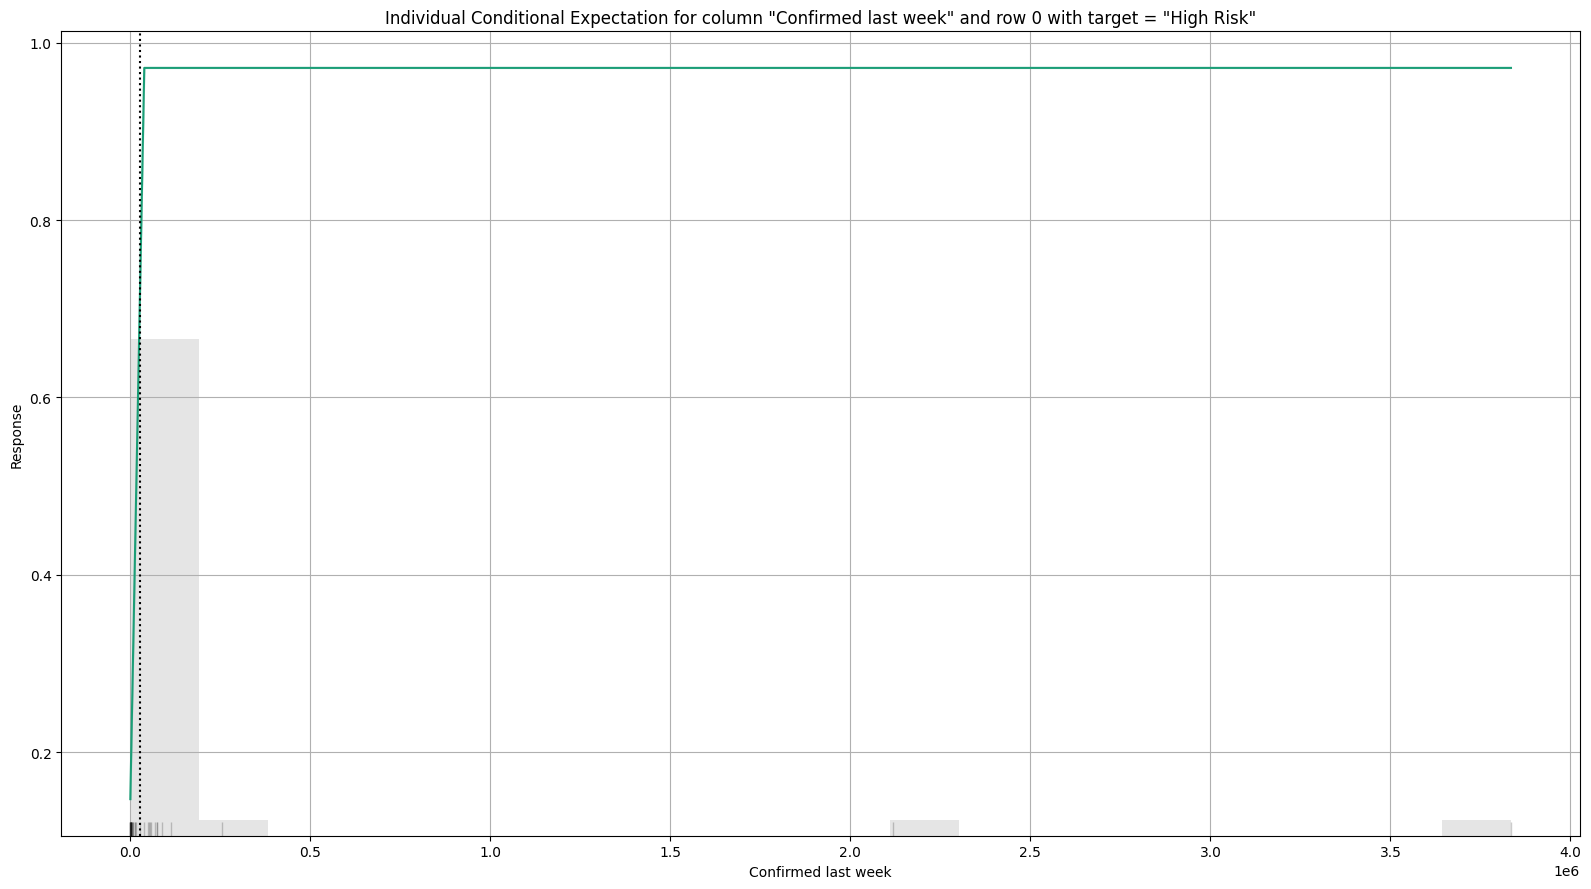

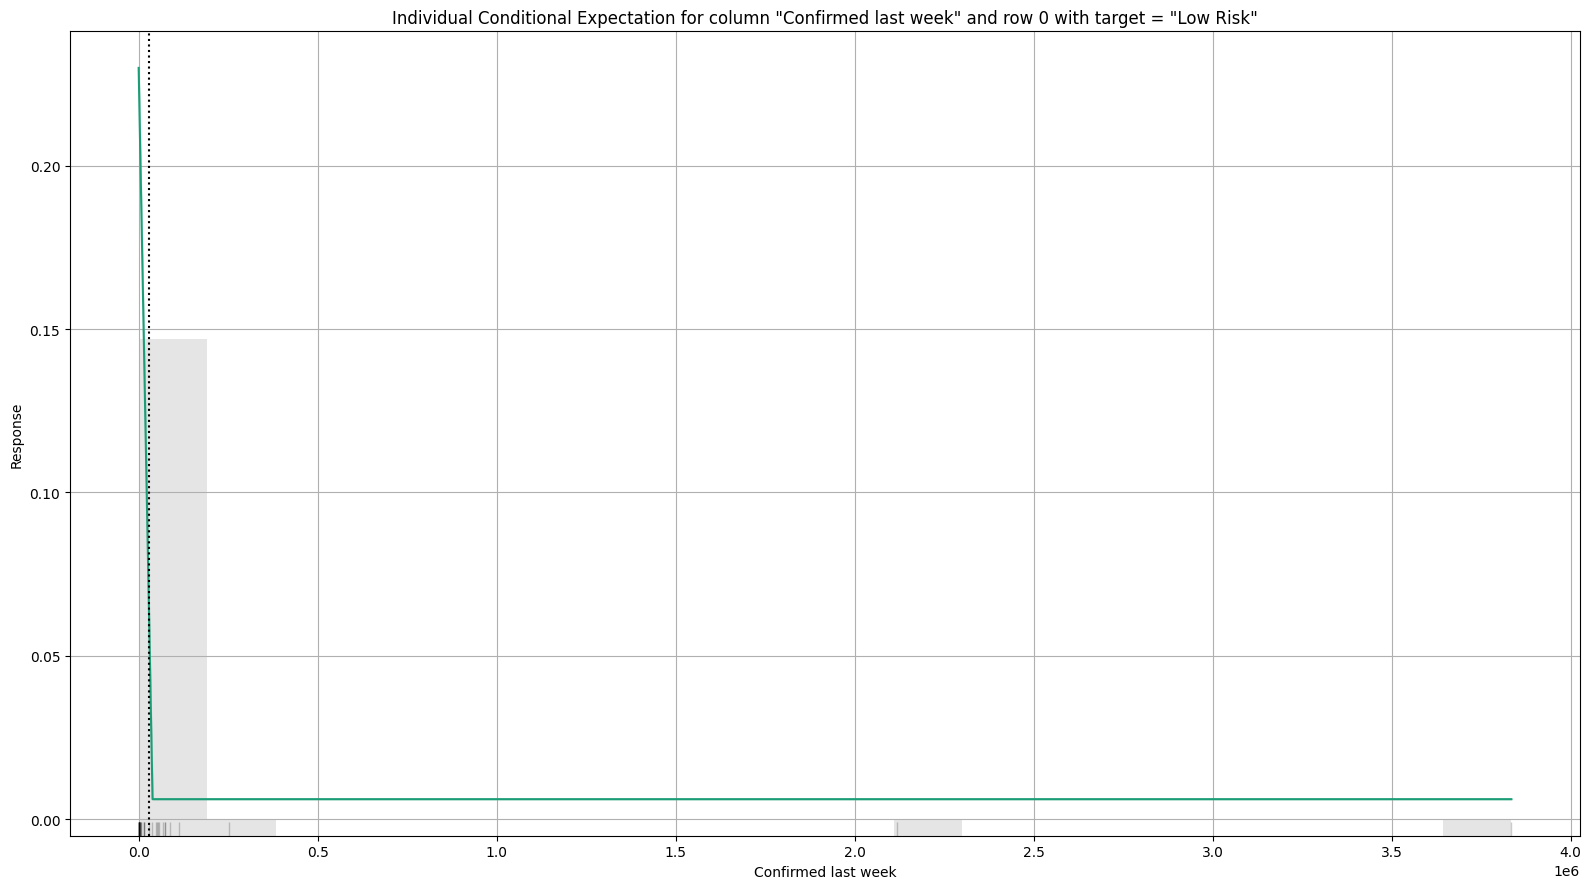

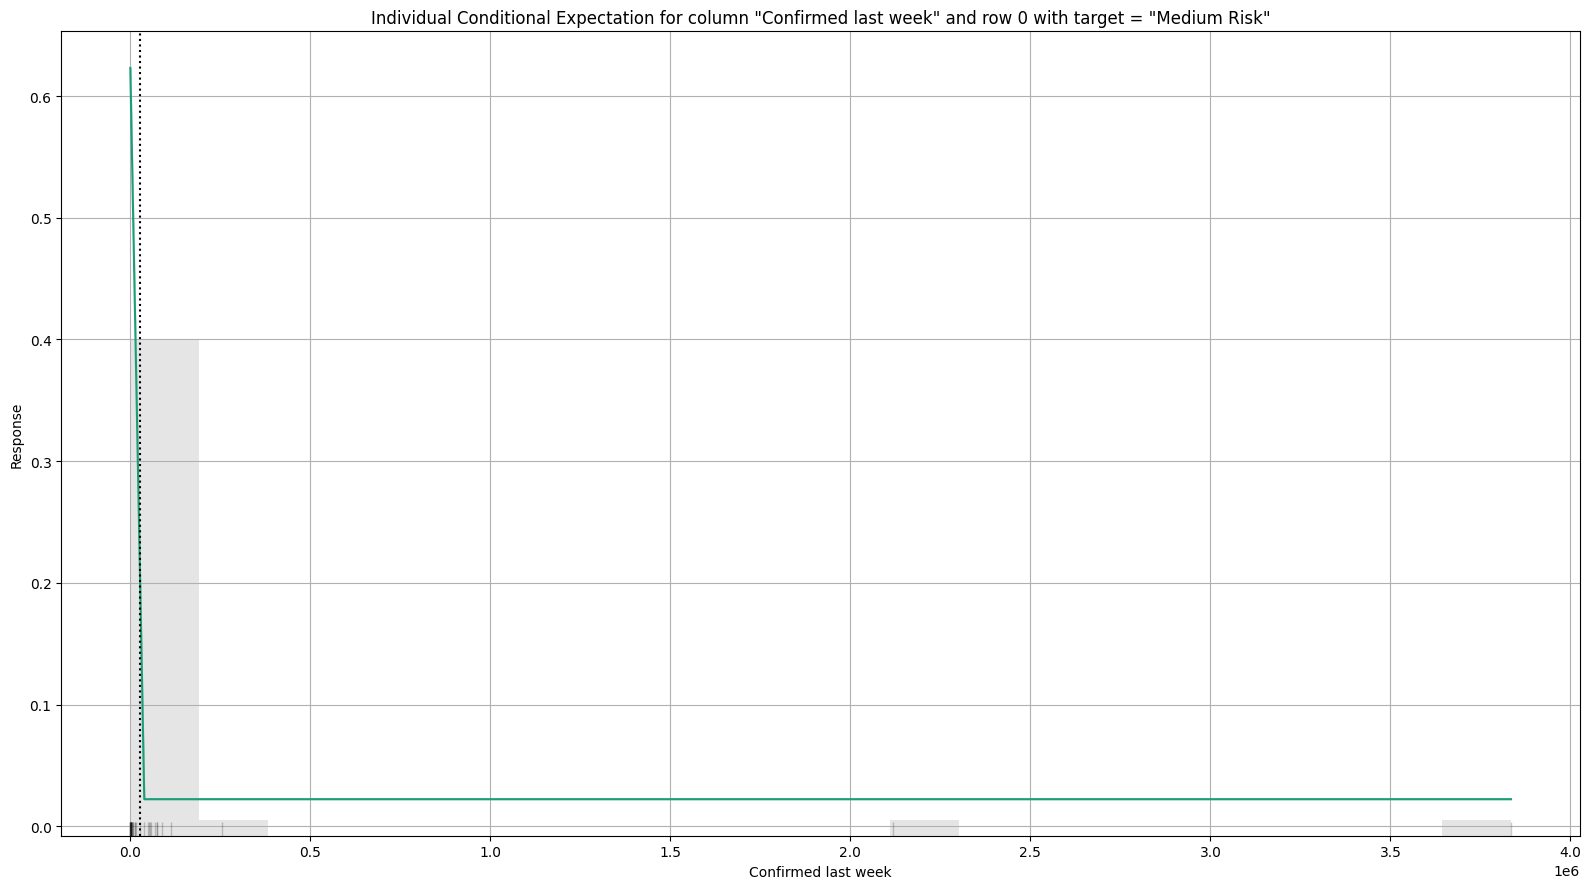

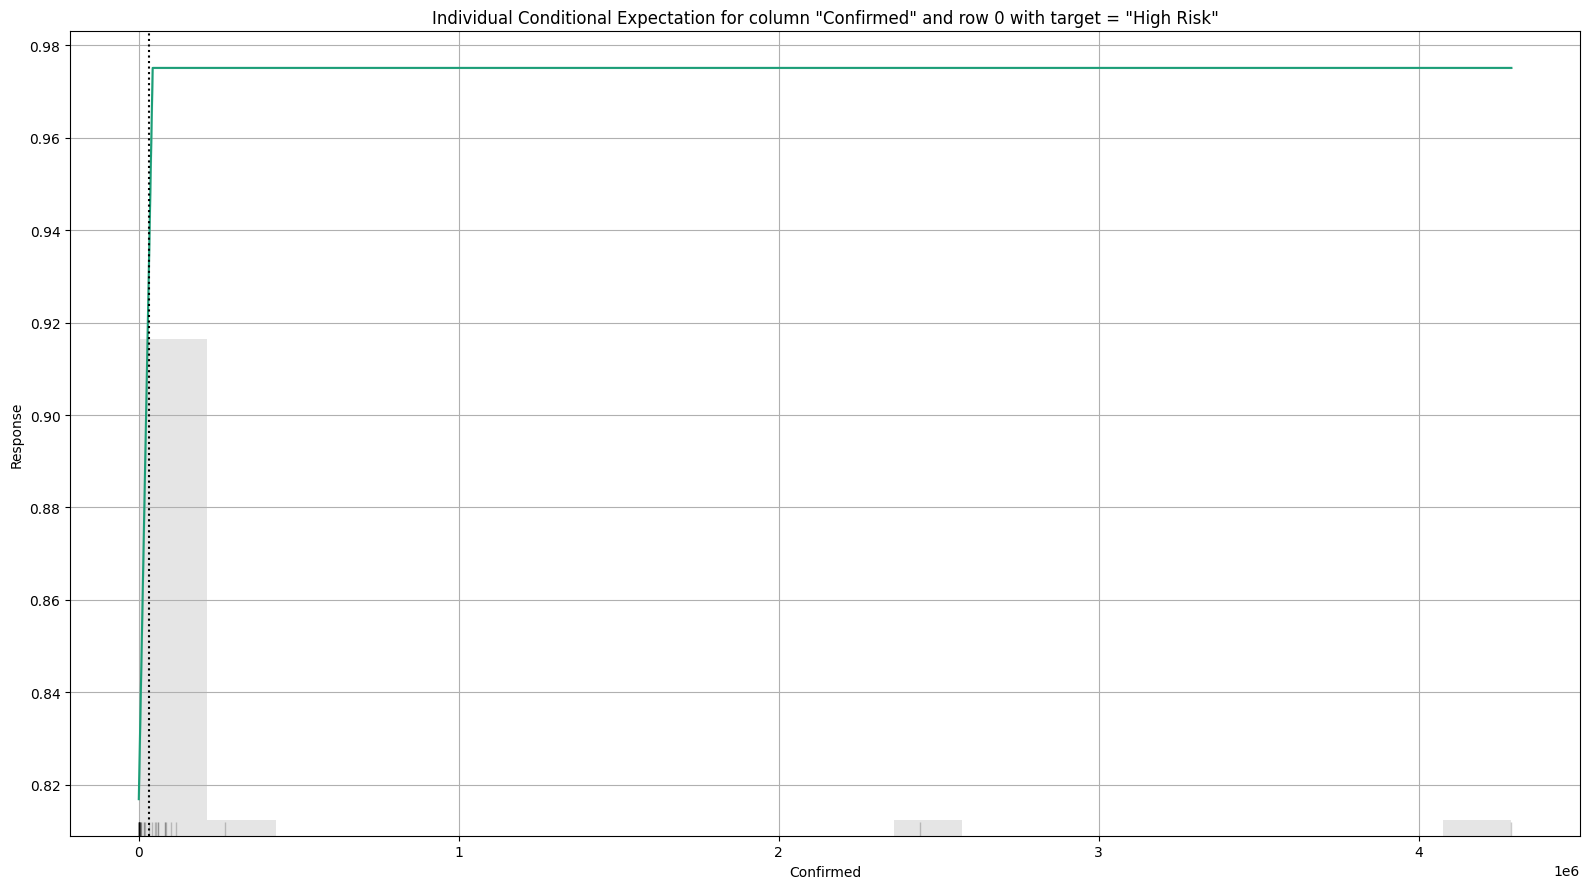

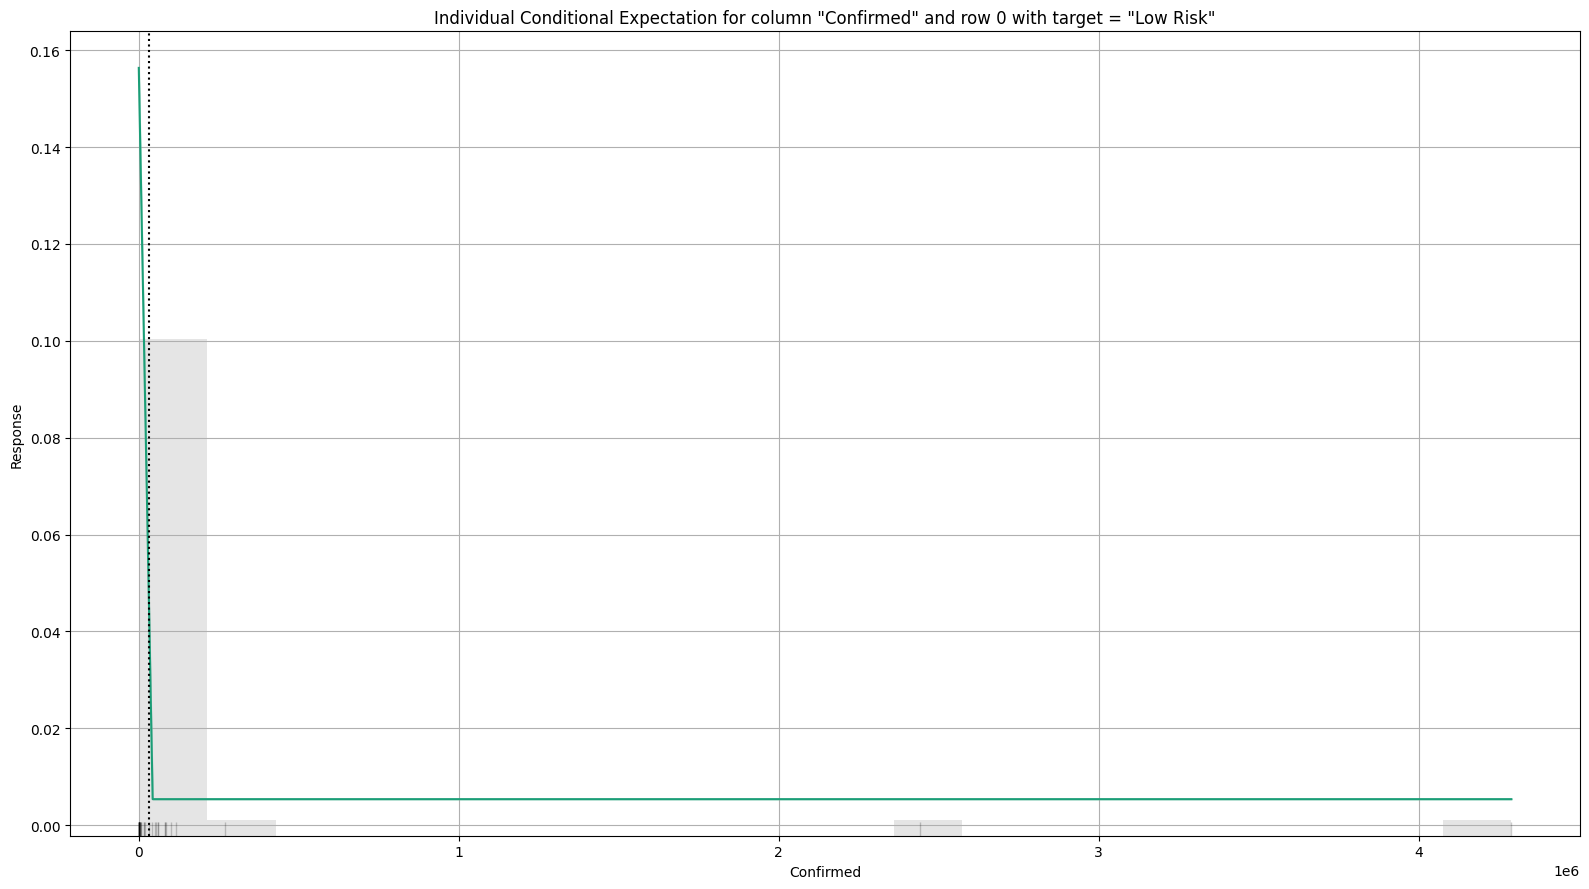

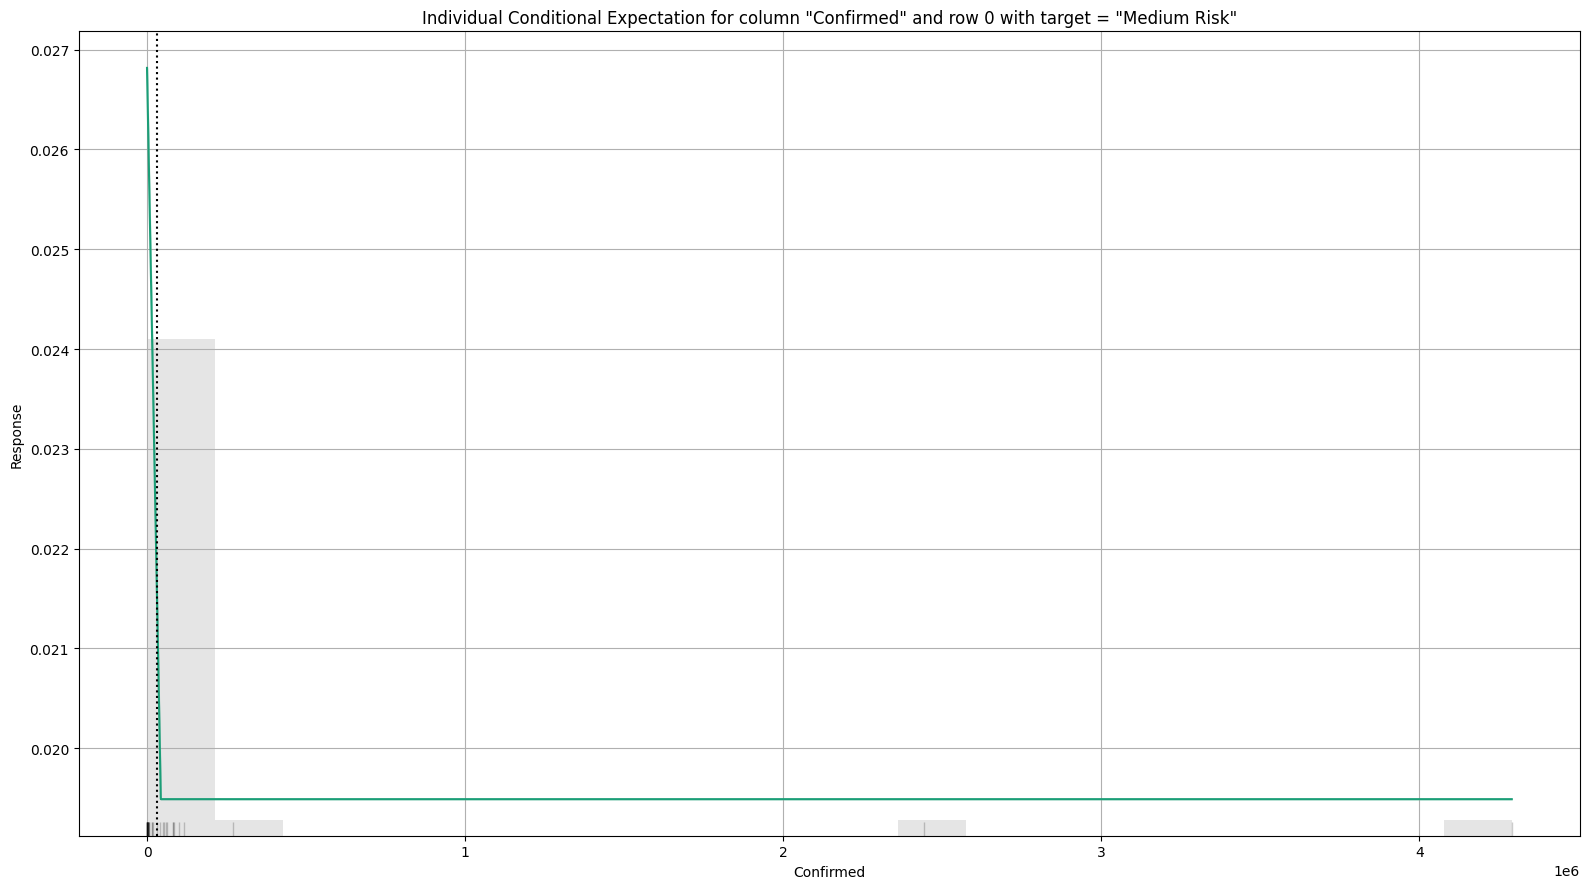

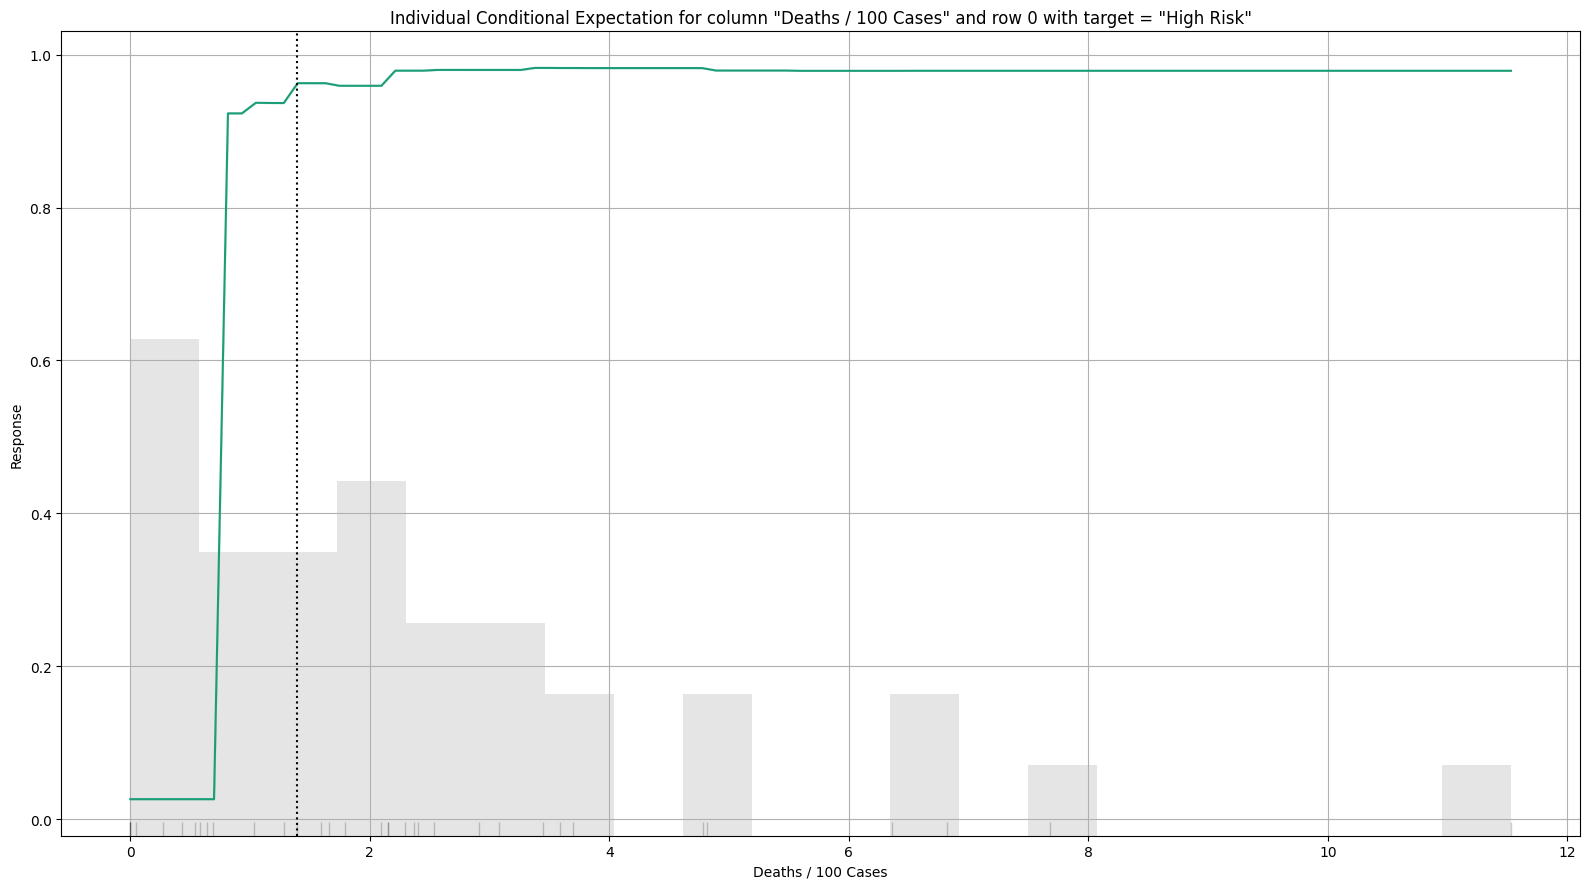

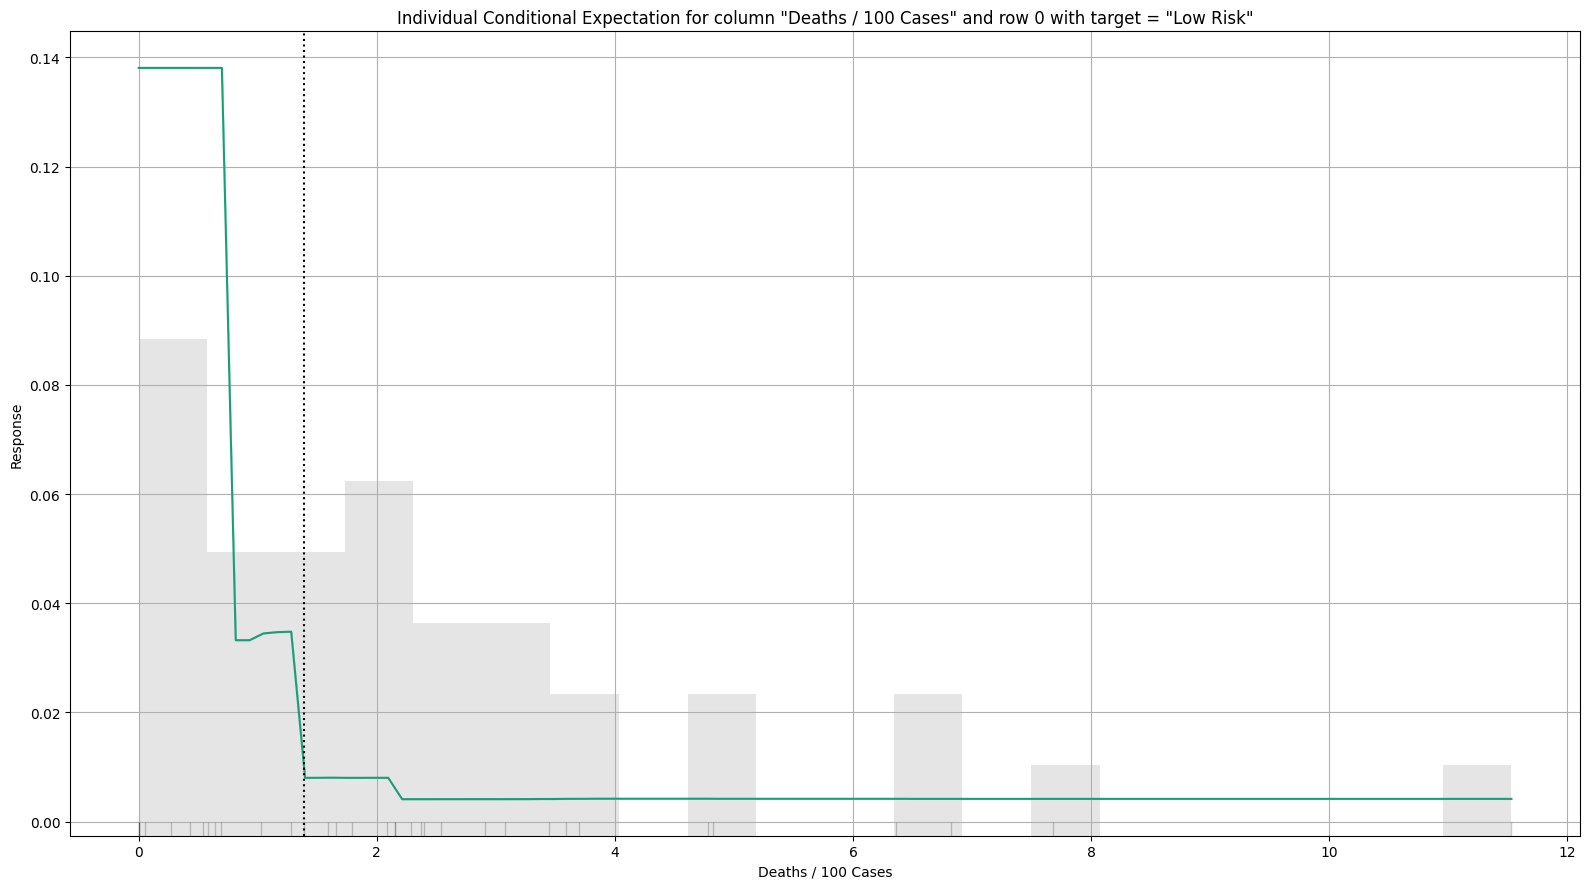

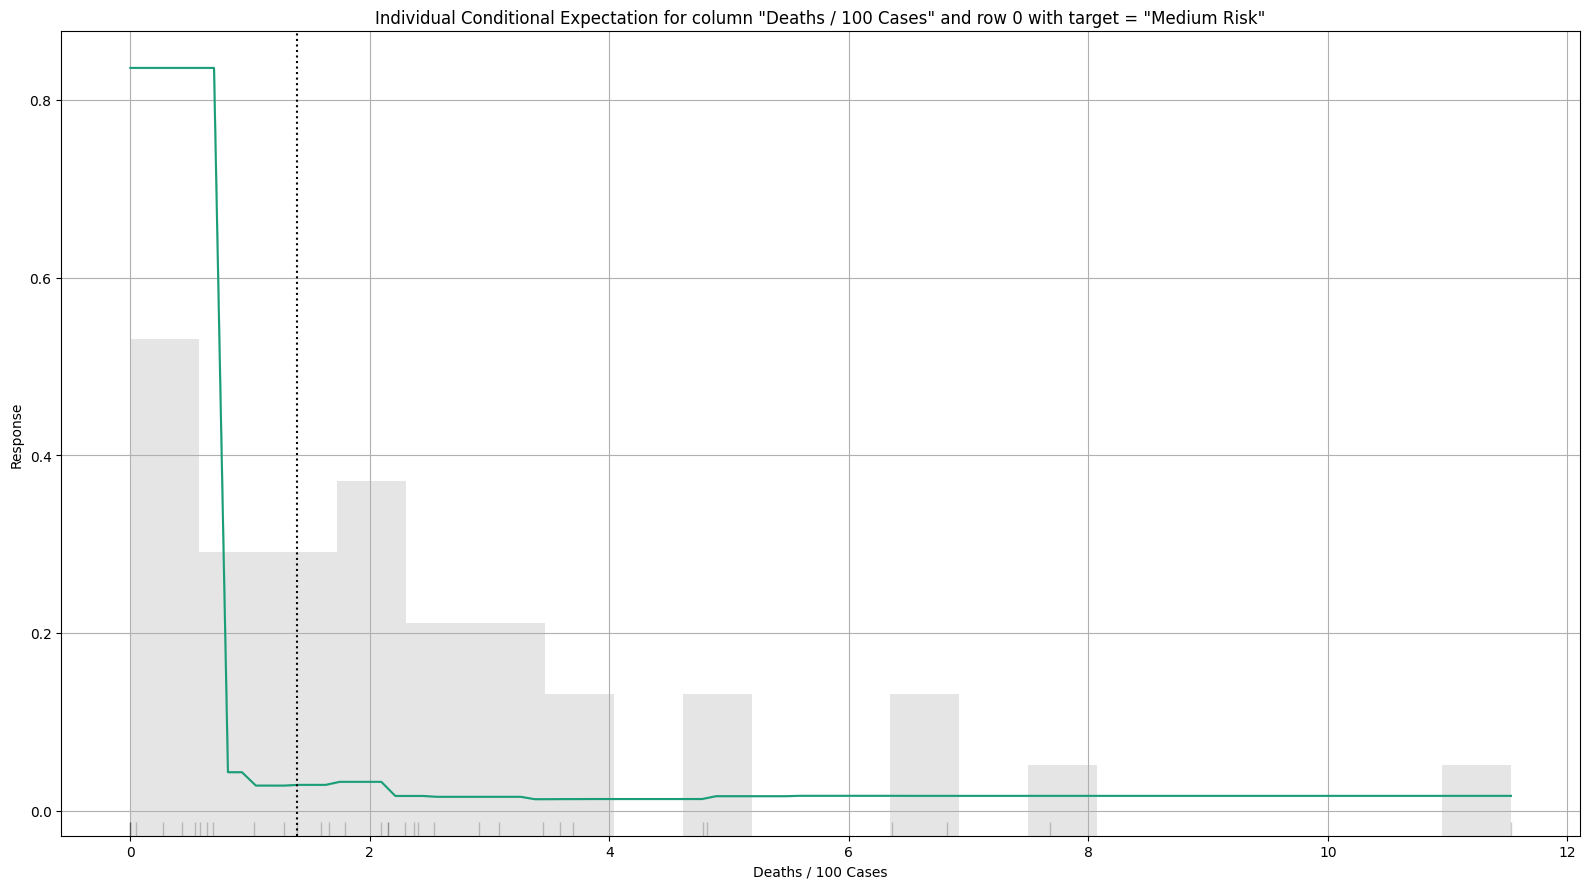

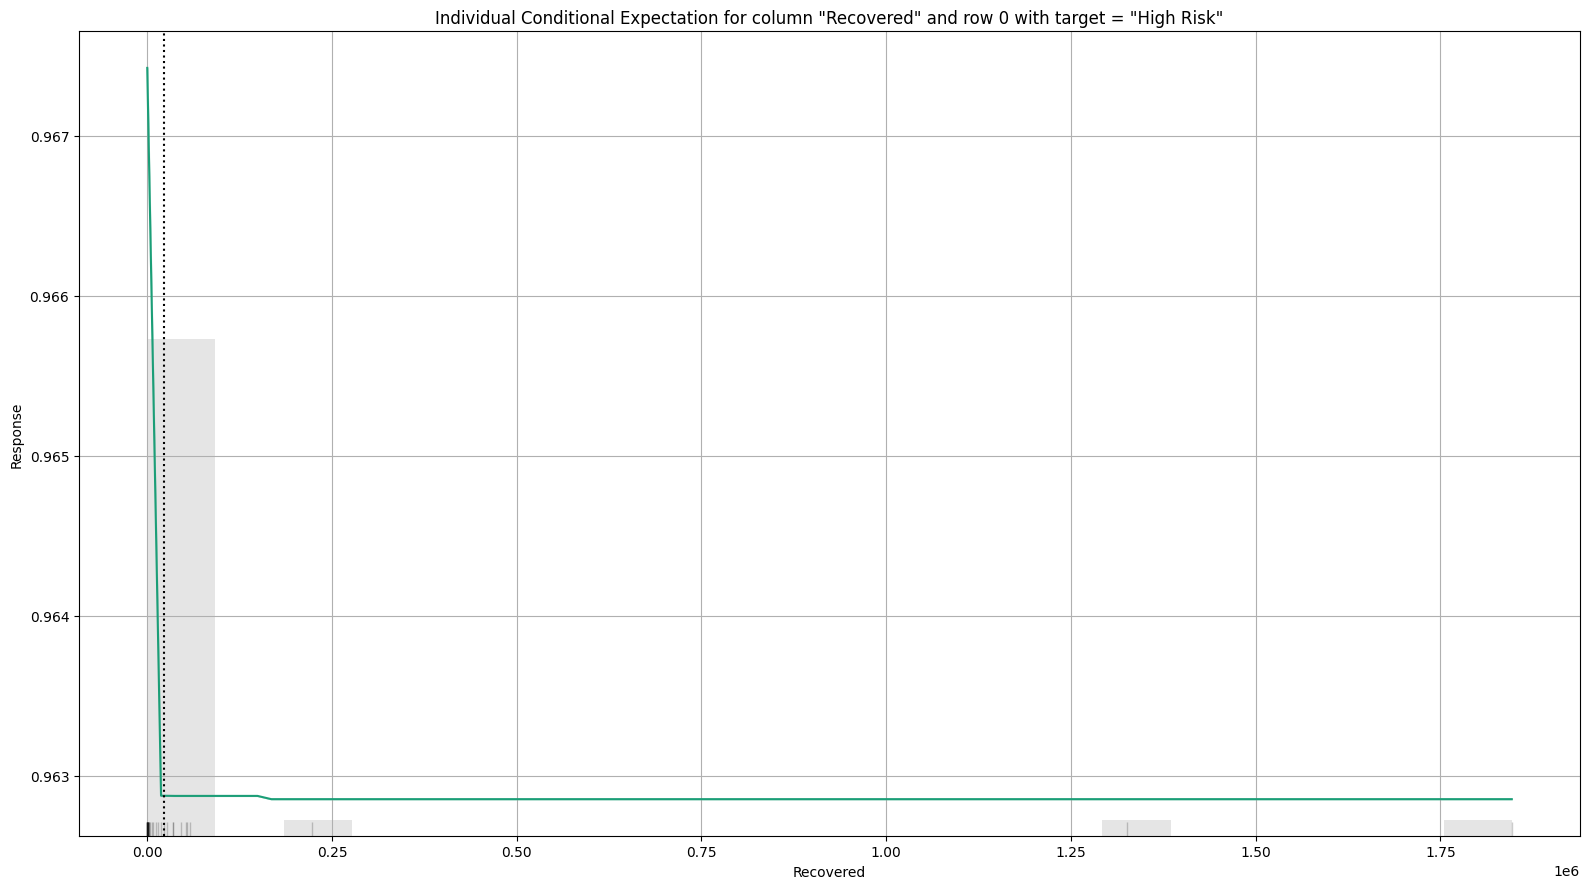

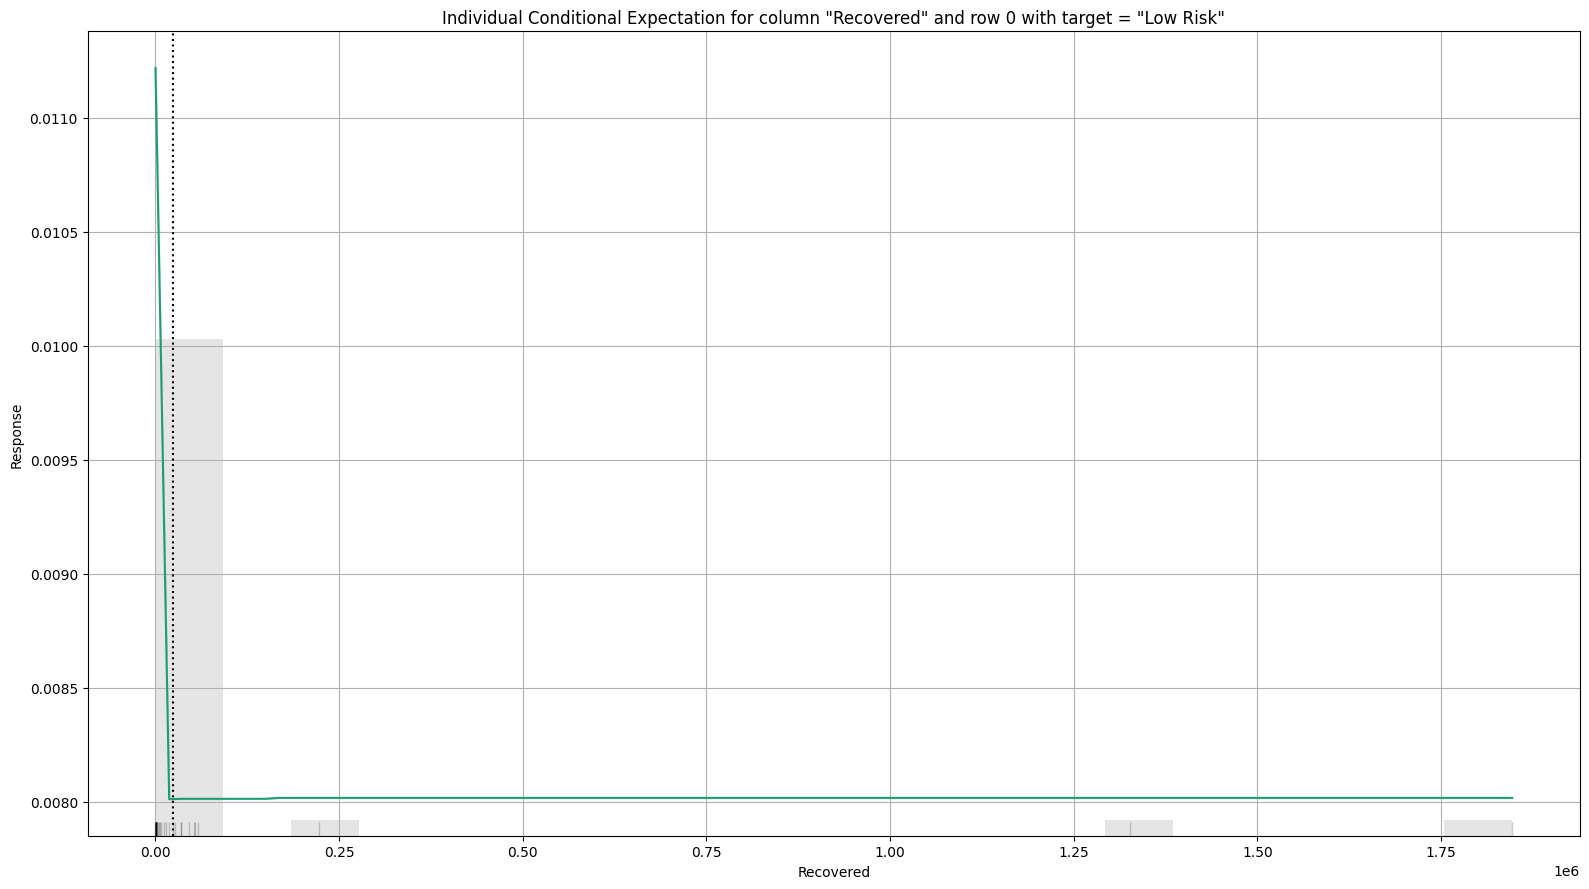

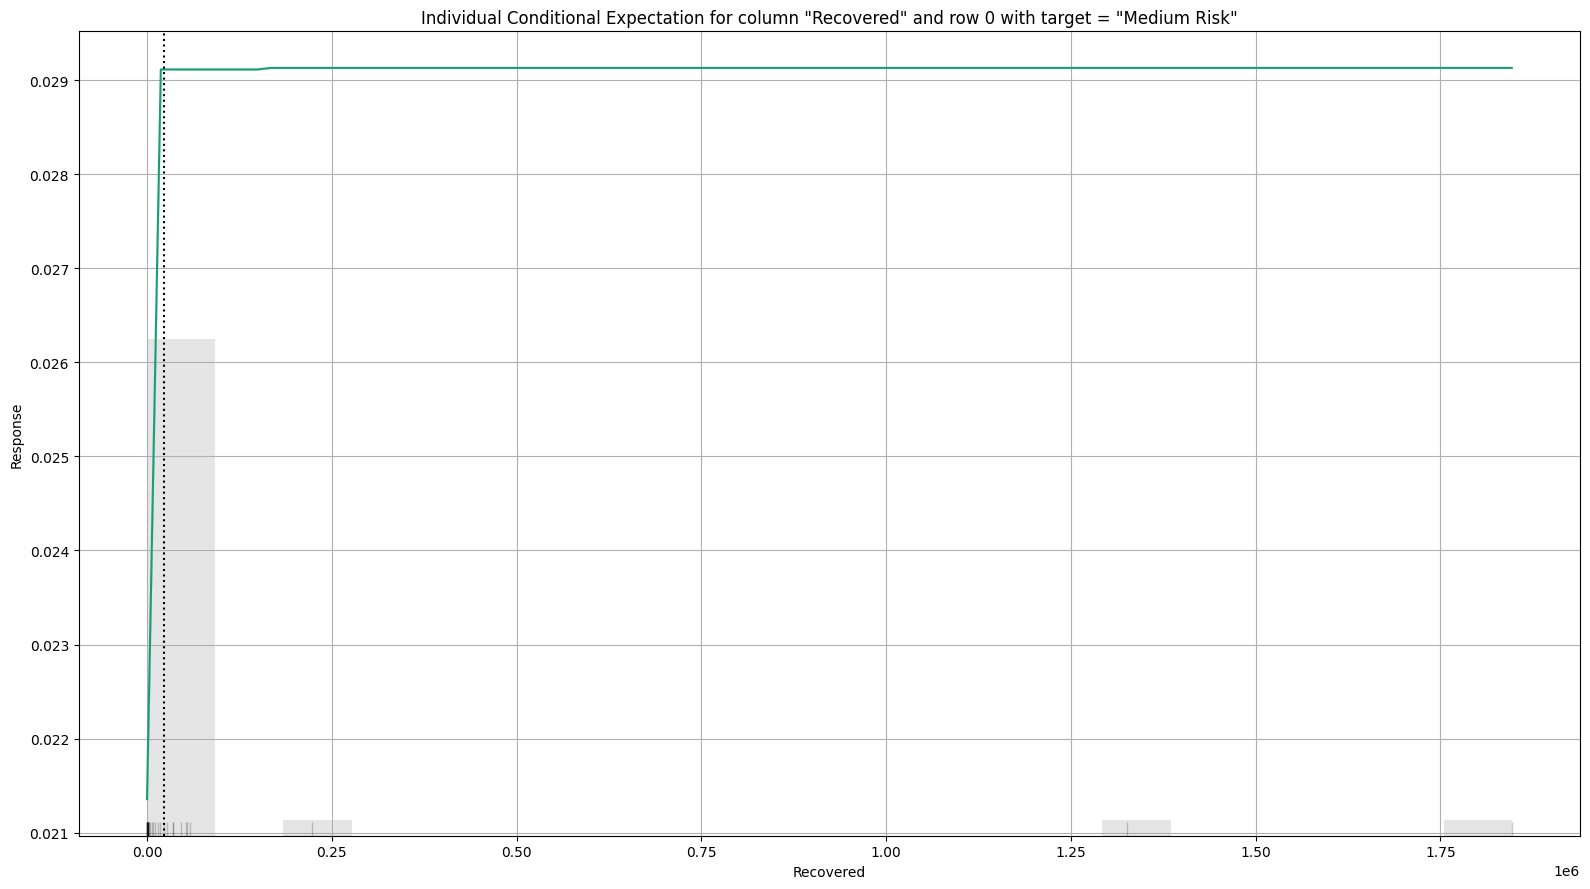

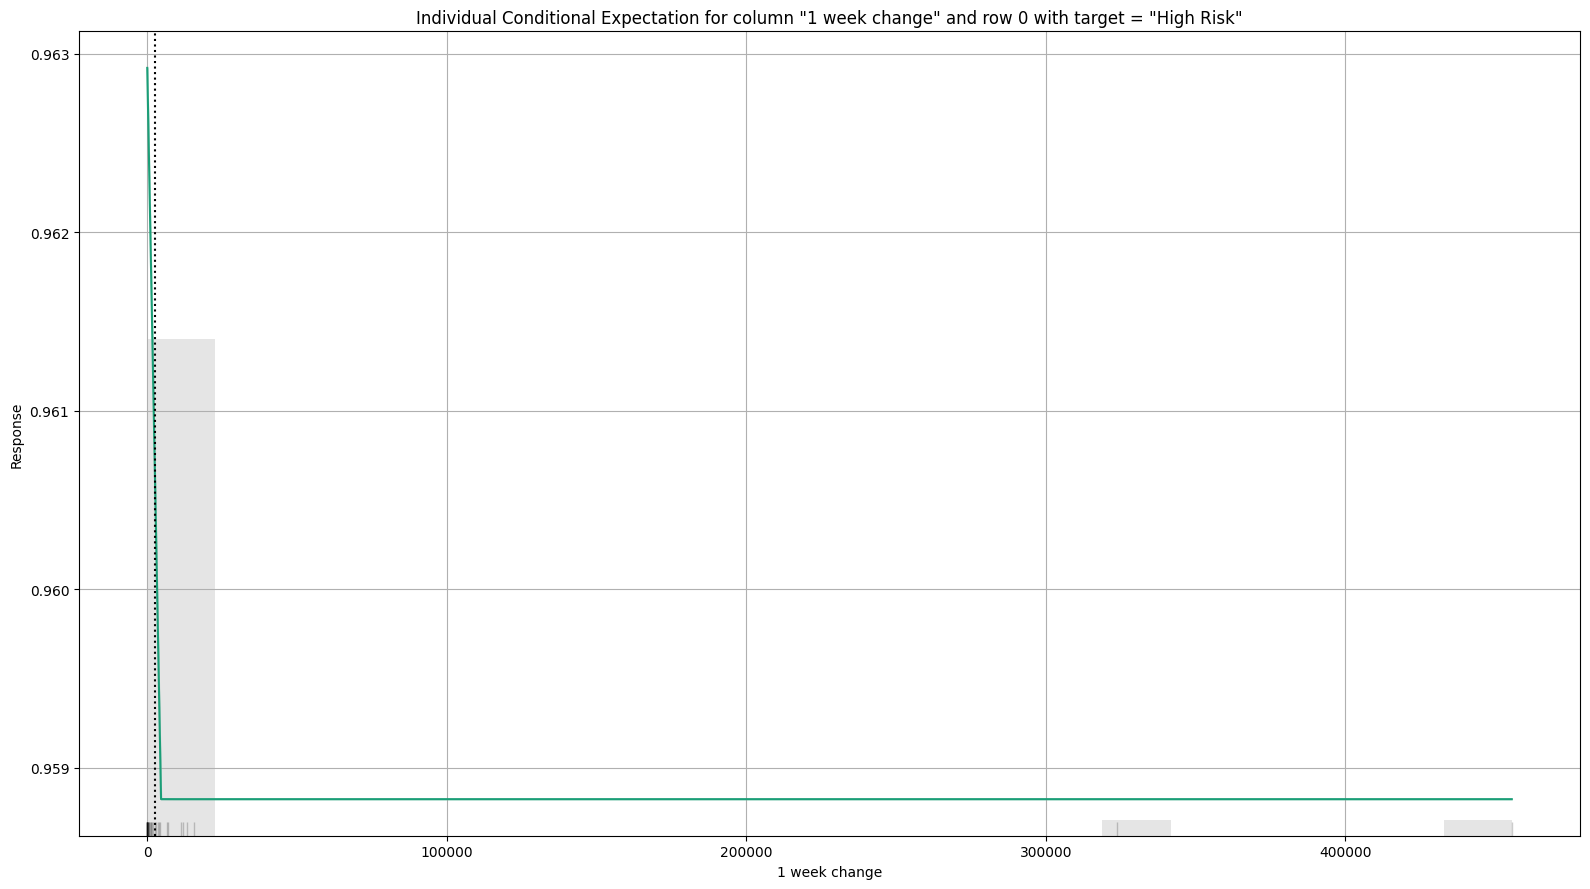

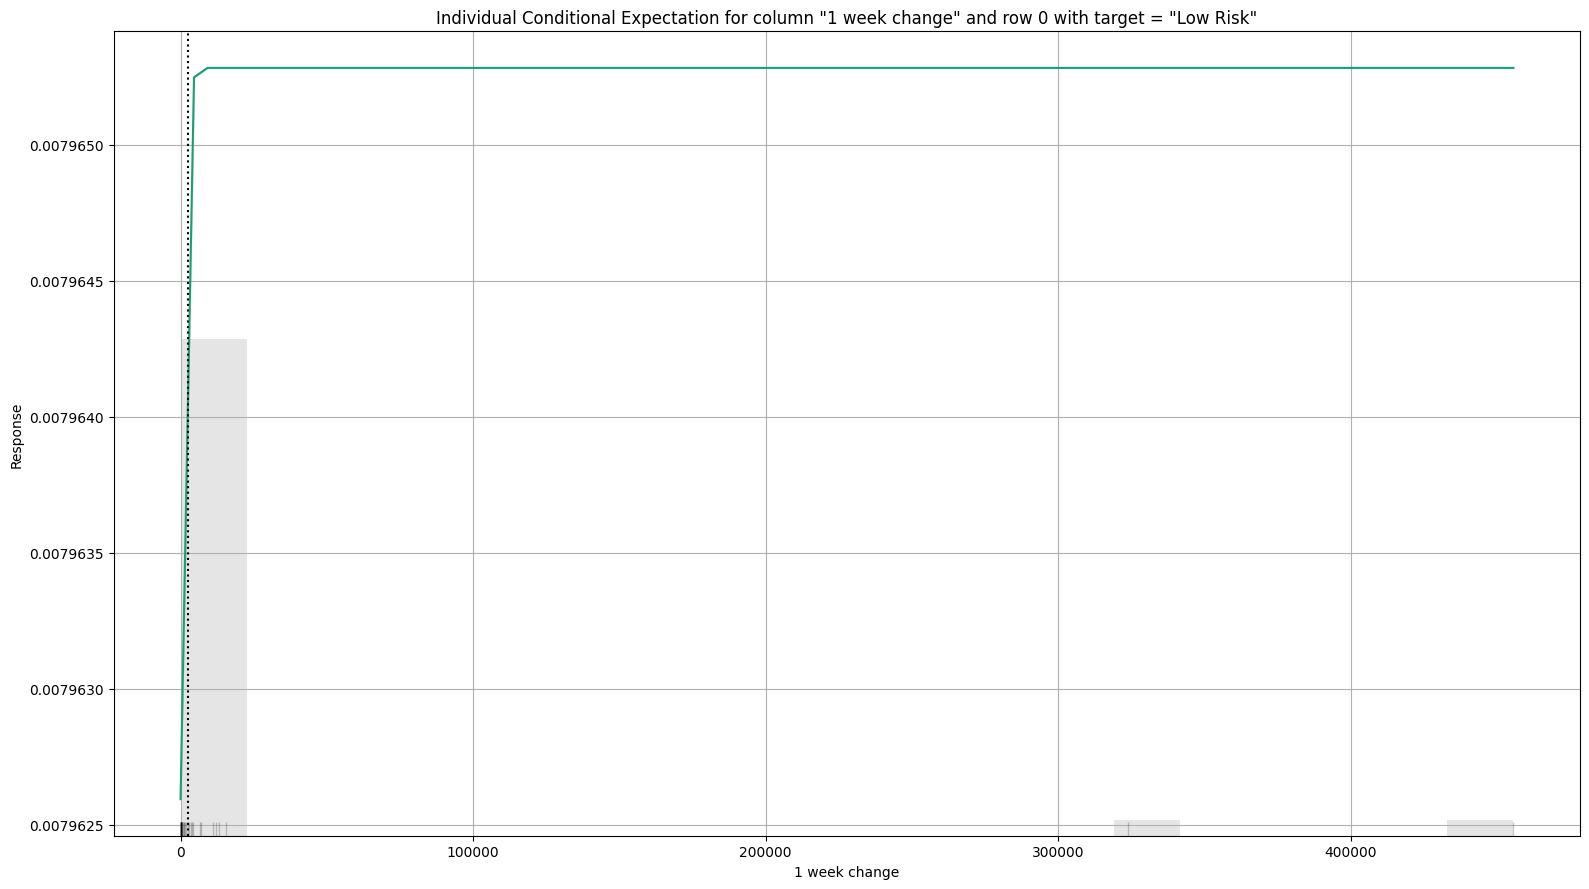

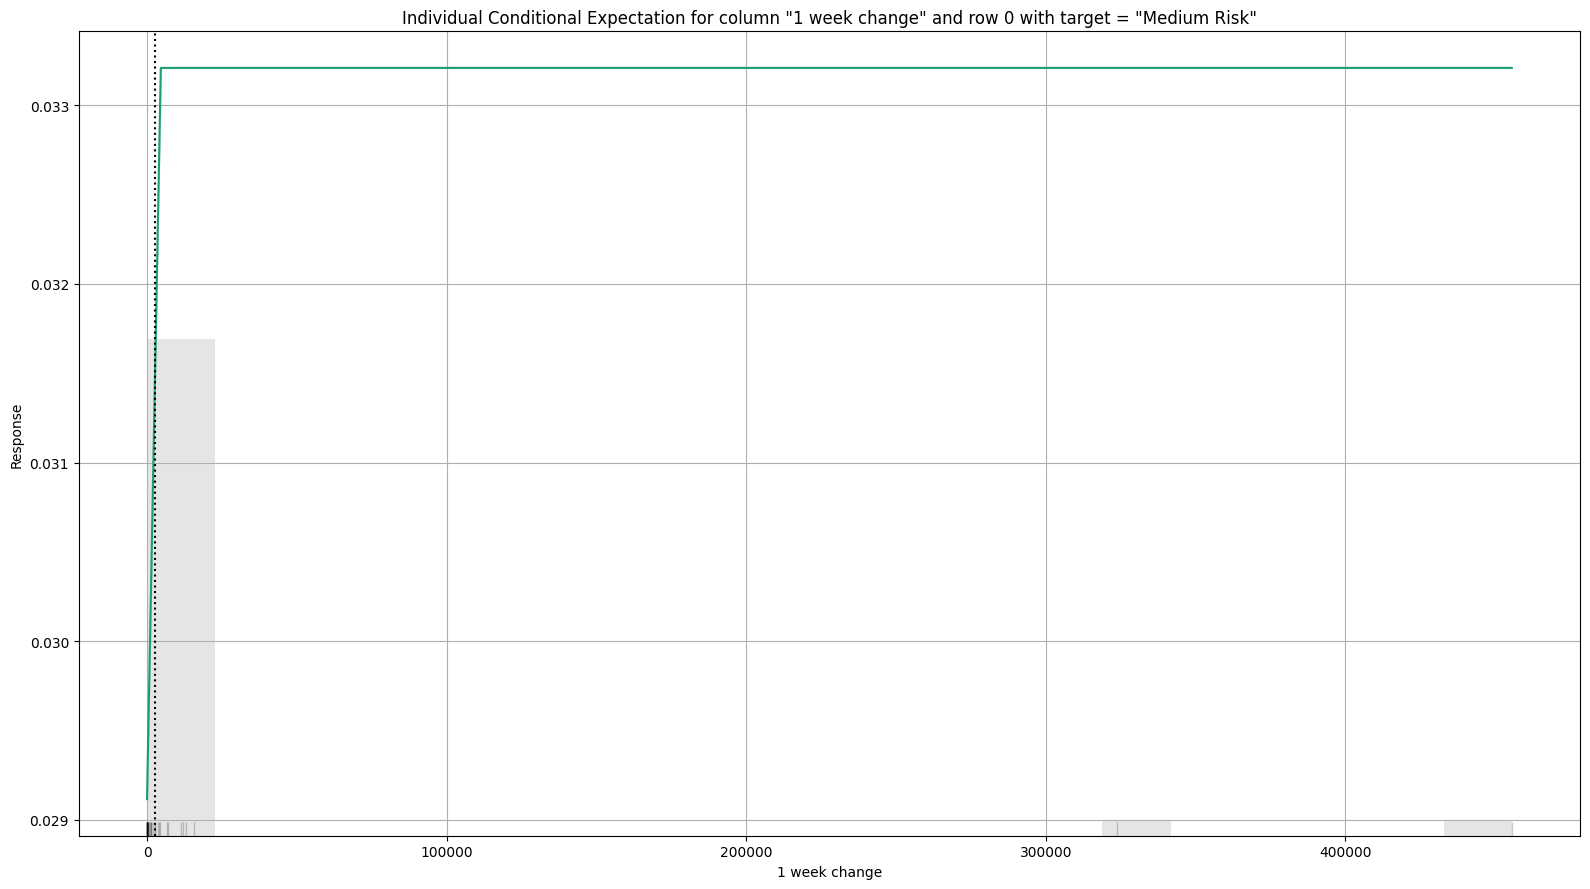



H2OExplanation([('ice', H2OExplanation([('header', <h2o.explanation._explain.Header object at 0x7f6d7cc6d0f0>), ('description', <h2o.explanation._explain.Description object at 0x7f6d7cb1e380>), ('plots', H2OExplanation([('Confirmed last week', H2OExplanation([('High Risk', <h2o.plot._plot_result._MObject object at 0x7f6d6c492230>), ('Low Risk', <h2o.plot._plot_result._MObject object at 0x7f6d7f558df0>), ('Medium Risk', <h2o.plot._plot_result._MObject object at 0x7f6d7cf6ed70>)])), ('Confirmed', H2OExplanation([('High Risk', <h2o.plot._plot_result._MObject object at 0x7f6d6d49cf70>), ('Low Risk', <h2o.plot._plot_result._MObject object at 0x7f6d6e717370>), ('Medium Risk', <h2o.plot._plot_result._MObject object at 0x7f6d6ea4ac80>)])), ('Deaths / 100 Cases', H2OExplanation([('High Risk', <h2o.plot._plot_result._MObject object at 0x7f6d6ea698d0>), ('Low Risk', <h2o.plot._plot_result._MObject object at 0x7f6d6e9724d0>), ('Medium Risk', <h2o.plot._plot_result._MObject object at 0x7f6d6e9f6a

In [57]:
# Explain first row with the leader model from AutoML
explanation = best_model.explain_row(test, row_index=0)

# Print the explanation
print(explanation)


TypeError: ignored

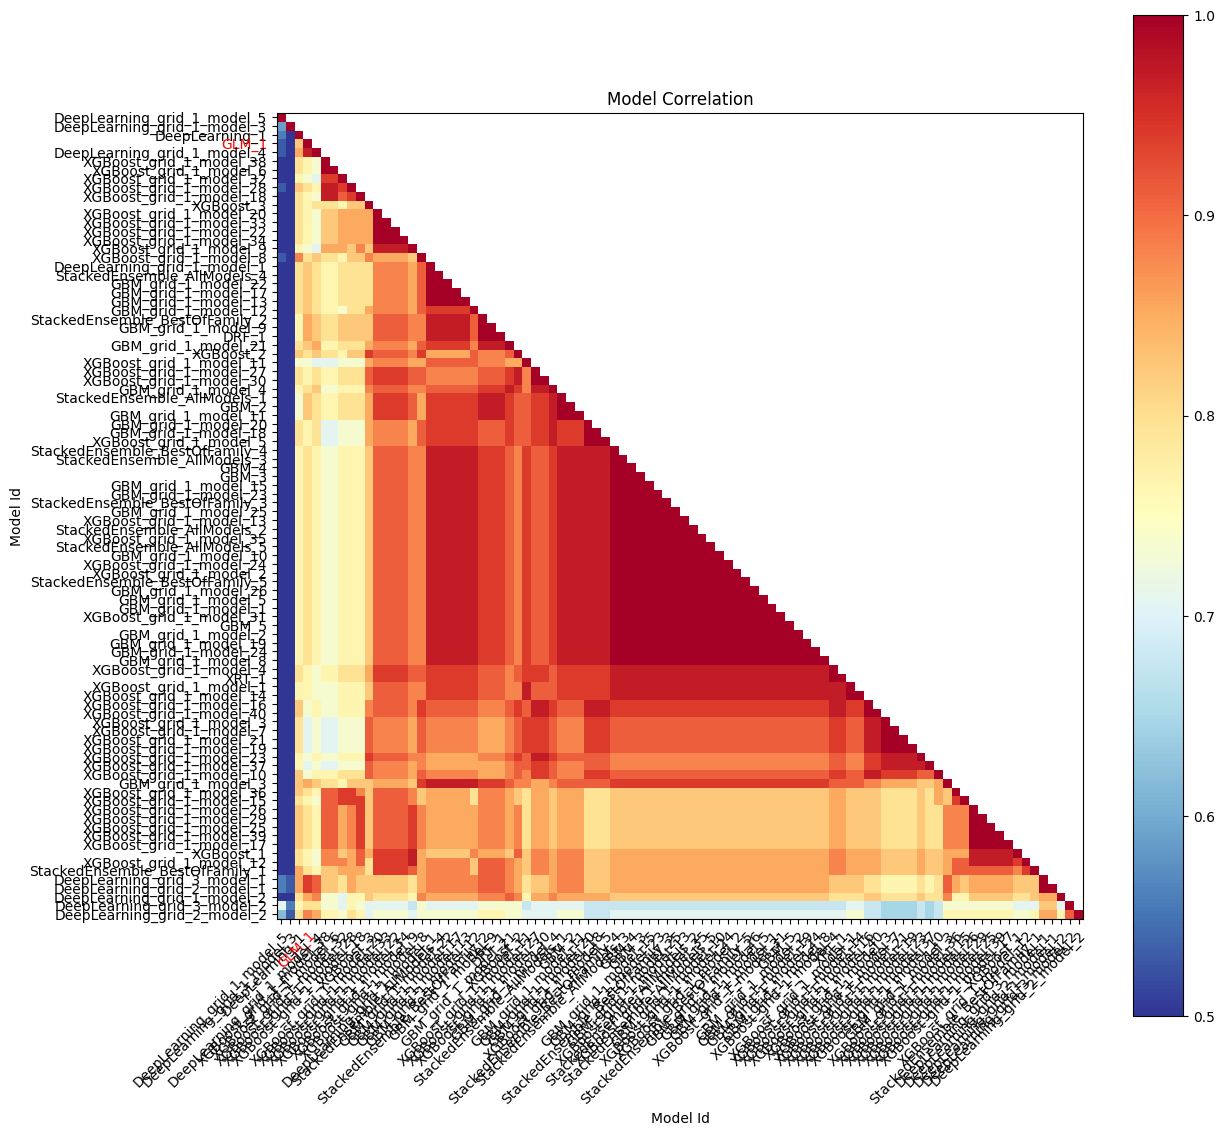

In [56]:
# Generate the model correlation heatmap
mc_plot = h2o.model_correlation_heatmap(automl.leaderboard, test)

# Set a larger figure size using h2o.display
h2o.display(mc_plot, width=1000, height=800)